## Retrieve timelapse image data from IDR using omero-py

This notebook loads the image data for a timelapse movie from the Mitocheck screen from the IDR servers.

Based on the following resources:

[Image.Sc Question/Discussion](https://forum.image.sc/t/downloading-raw-timelapse-movies-from-idr-omero-ideally-in-python/43604) 
and the [following notebook exmample](https://github.com/ome/omero-guide-cellprofiler/blob/master/notebooks/idr0002.ipynb) mentioned in the discussion.

The sample timelapse movie is at: https://idr.openmicroscopy.org/webclient/img_detail/1512575/



In [1]:
import numpy as np
import omero
from omero.gateway import BlitzGateway

## Connect

In [2]:
conn = BlitzGateway(host='ws://idr.openmicroscopy.org/omero-ws', username='public', passwd='public', secure=True)
print(conn.connect())
conn.c.enableKeepAlive(60)


True


## Get IDs through web interface 

For now we just get the IDs through the web interface. May look into how to query this through the Python API later.

Exploring with the web interface we can see that image linked to in the first cell has is part of the Mitocheck screen named `idr0013-neumann-mitocheck/screenA` with `screen id = 1101`,`plate id = 3555`, `well id = 799924` and `image id = 1512575`.

We start by retrieving the image using the `getObject` method with the id and the we work our way up through the parents.

In [3]:
image_id = 1512575
idr_img = plate = conn.getObject("Image", image_id)

In [4]:
idr_img.getName()

'LT0023_01 [Well F10, Field 1]'

Playing with autocomplete it is easy to discover that the image object has a `getPlate` method.

In [5]:
idr_plate = idr_img.getPlate()
idr_plate

<_PlateWrapper id=3555>

In [6]:
idr_plate.getName()

'LT0023_01'

I did not find corresponding `getWell` or `getScreen` methods. We can access those through `getParent`.

In [7]:
idr_well = idr_img.getParent().getParent()
idr_well

<_WellWrapper id=799924>

In [8]:
idr_screen = idr_plate.getParent()
idr_screen

<_ScreenWrapper id=1101>

In [9]:
idr_screen.getName()

'idr0013-neumann-mitocheck/screenA'

## Query image shape and retrieve raw pixel values

In [10]:
idr_pixels = idr_img.getPrimaryPixels()
idr_pixels

<_PixelsWrapper id=1512575>

In [11]:
nc = idr_img.getSizeC()
"nr of channels:", nc 

('nr of channels:', 1)

In [12]:
nt = idr_img.getSizeT()
"nr of timepoints:", nt 

('nr of timepoints:', 93)

We get the idea ... 

In [13]:
_i = idr_img
img_shape = (_i.getSizeT(), _i.getSizeZ(), _i.getSizeY(), _i.getSizeX(), _i.getSizeC())
img_shape

(93, 1, 1024, 1344, 1)

In [14]:
idr_pixels.getPixelsType()

<BlitzObjectWrapper id=5>

not sure what data type is represented by id 5 but will press on ...

there also seems to be a tile dimension. Doesn't apply here. Get the help for `getPlane`

In [15]:
idr_pixels.getTile?

In [16]:
idr_pixels.getPlane?

In [17]:
idr_pixels.getPlanes??

Get a single plane

In [18]:
_sample_array = idr_pixels.getPlane(theC=0, theT=0, theZ=0)
type(_sample_array)

numpy.ndarray

In [19]:
_sample_array.dtype

dtype('uint8')

In [20]:
_sample_array.shape

(1024, 1344)

Get multiple planes

In [21]:
_multiple = idr_pixels.getPlanes(((0,0,0),(0,0,1), (0,0,2))) # (z,c,t) tuple order

In [22]:
_multiple

<generator object _PixelsWrapper.getTiles at 0x7f15d8117308>

In [23]:
_multiple_array = np.asarray(list(_multiple))

In [24]:
_multiple_array.shape

(3, 1024, 1344)

 Now retrieve the whole time series

In [25]:
all_planes = [(0, 0, t) for t in range(nt)]
all_planes

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 0, 10),
 (0, 0, 11),
 (0, 0, 12),
 (0, 0, 13),
 (0, 0, 14),
 (0, 0, 15),
 (0, 0, 16),
 (0, 0, 17),
 (0, 0, 18),
 (0, 0, 19),
 (0, 0, 20),
 (0, 0, 21),
 (0, 0, 22),
 (0, 0, 23),
 (0, 0, 24),
 (0, 0, 25),
 (0, 0, 26),
 (0, 0, 27),
 (0, 0, 28),
 (0, 0, 29),
 (0, 0, 30),
 (0, 0, 31),
 (0, 0, 32),
 (0, 0, 33),
 (0, 0, 34),
 (0, 0, 35),
 (0, 0, 36),
 (0, 0, 37),
 (0, 0, 38),
 (0, 0, 39),
 (0, 0, 40),
 (0, 0, 41),
 (0, 0, 42),
 (0, 0, 43),
 (0, 0, 44),
 (0, 0, 45),
 (0, 0, 46),
 (0, 0, 47),
 (0, 0, 48),
 (0, 0, 49),
 (0, 0, 50),
 (0, 0, 51),
 (0, 0, 52),
 (0, 0, 53),
 (0, 0, 54),
 (0, 0, 55),
 (0, 0, 56),
 (0, 0, 57),
 (0, 0, 58),
 (0, 0, 59),
 (0, 0, 60),
 (0, 0, 61),
 (0, 0, 62),
 (0, 0, 63),
 (0, 0, 64),
 (0, 0, 65),
 (0, 0, 66),
 (0, 0, 67),
 (0, 0, 68),
 (0, 0, 69),
 (0, 0, 70),
 (0, 0, 71),
 (0, 0, 72),
 (0, 0, 73),
 (0, 0, 74),
 (0, 0, 75),
 (0, 0, 76),
 (0, 0, 7

The following can take a while (and you may run out of memory).
A _lazy_ alternative would be to use `dask.delayed`. But as we want to render in 3D (further down) that would not help us much here.

In [26]:
whole_timeseries = np.asarray(list(idr_pixels.getPlanes(all_planes)))

In [27]:
whole_timeseries.shape

(93, 1024, 1344)

## Visualize the time series as a 3D stack (volume-rendered kymograph)

You can nicely see how cells condense for mitosis and then divide

In [28]:
import napari
from napari.utils import  nbscreenshot

In [29]:
%gui qt

In [30]:
v=napari.Viewer()

In [31]:
layer = v.add_image(whole_timeseries)

In [32]:
v.dims.ndisplay=3
layer.scale = (5,1,1)

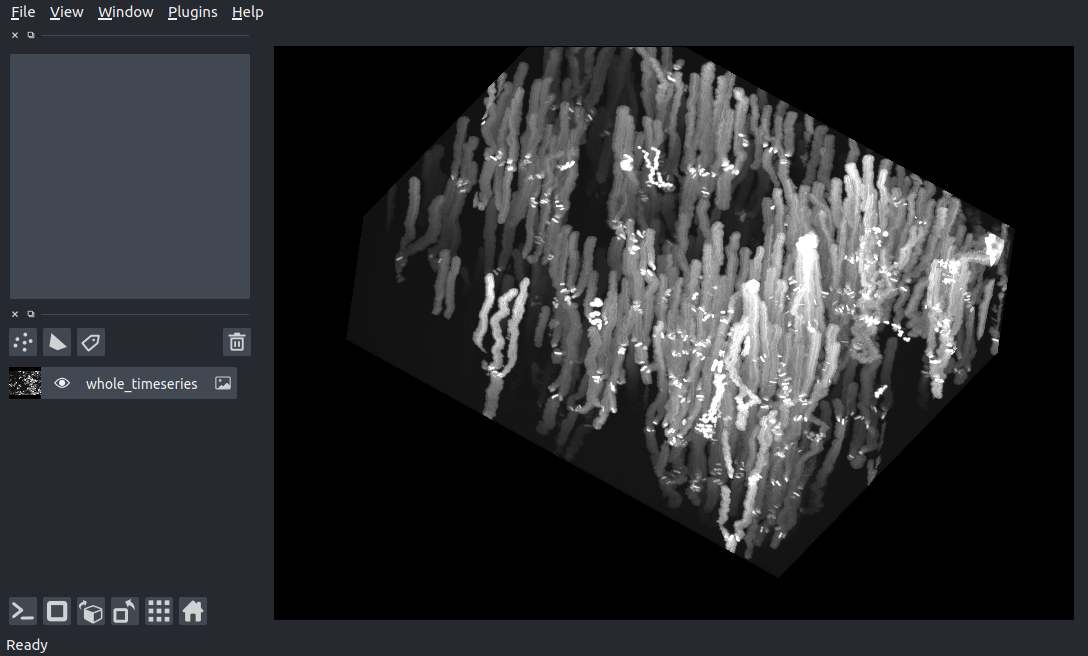

In [33]:
nbscreenshot(v)